In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from pandas import DataFrame
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import csv


plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('crypto-markets.csv')
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [3]:
bitcoin = df[(df['name'] == 'Bitcoin') & (df['volume'] != 0)]
bitcoin.shape

(1799, 13)

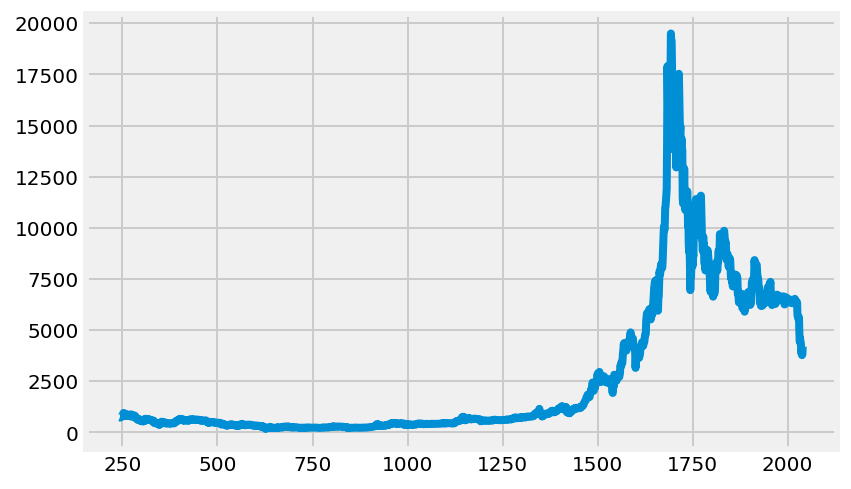

In [4]:
plt.plot(bitcoin['close'])

In [5]:
bitcoin.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
243,bitcoin,BTC,Bitcoin,2013-12-27,1,763.28,777.51,713.60,735.07,46862700.0,8.955395e+09,0.3359,63.91
244,bitcoin,BTC,Bitcoin,2013-12-28,1,737.98,747.06,705.35,727.83,32505800.0,8.869919e+09,0.5390,41.71
245,bitcoin,BTC,Bitcoin,2013-12-29,1,728.05,748.61,714.44,745.05,19011300.0,9.082104e+09,0.8958,34.17
246,bitcoin,BTC,Bitcoin,2013-12-30,1,741.35,766.60,740.24,756.13,20707700.0,9.217168e+09,0.6028,26.36
247,bitcoin,BTC,Bitcoin,2013-12-31,1,760.32,760.58,738.17,754.01,20897300.0,9.191325e+09,0.7068,22.41


In [6]:
bitcoin.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,1799.0,1799.000000,1799.000000,1799.000000,1799.000000,1.799000e+03,1.799000e+03,1799.000000,1799.000000
mean,1.0,2561.064069,2637.460067,2474.643702,2562.815481,1.646021e+09,4.256929e+10,0.536950,162.816365
std,0.0,3574.098055,3705.964702,3412.729018,3573.821245,3.191497e+09,6.083674e+10,0.300733,375.938702
min,1.0,176.900000,211.730000,171.510000,178.100000,2.857830e+06,2.444379e+09,0.000000,1.030000
25%,1.0,390.615000,402.275000,380.665000,390.000000,2.625100e+07,5.609891e+09,0.269800,8.235000
50%,1.0,631.880000,642.100000,622.400000,632.000000,7.358860e+07,9.546133e+09,0.555800,22.390000
75%,1.0,4127.225000,4244.350000,3960.795000,4141.165000,1.819985e+09,6.865241e+10,0.805950,143.020000
max,1.0,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.265025e+11,1.000000,4110.400000


In [8]:
price=bitcoin['close']
windows = list(range(2, 32)) 
# Calculate the sd and volatility
for window in windows:
    mean = price.shift().rolling(window).mean()
    sd = price.shift().rolling(window).std()
    vol = price.shift().rolling(window).std() * np.sqrt(window) 
    
    bitcoin[str(window) + ' Day' + ' Rolling Mean'] = mean
    bitcoin[str(window) + ' Day' + ' Volatility'] = vol
    bitcoin[str(window) + ' Day' + ' SD'] = sd

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [18]:
synthetic_col_names = bitcoin.columns[13:103]
bitcoin[synthetic_col_names].head(10)

,2 Day Rolling Mean,2 Day Volatility,2 Day SD,3 Day Rolling Mean,3 Day Volatility,3 Day SD,4 Day Rolling Mean,4 Day Volatility,4 Day SD,5 Day Rolling Mean,...,28 Day SD,29 Day Rolling Mean,29 Day Volatility,29 Day SD,30 Day Rolling Mean,30 Day Volatility,30 Day SD,31 Day Rolling Mean,31 Day Volatility,31 Day SD
243,731.450,7.24,5.119453,735.983333,14.975754,8.646255,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
244,731.450,7.24,5.119453,735.983333,14.975754,8.646255,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
245,731.450,7.24,5.119453,735.983333,14.975754,8.646255,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
246,736.440,17.22,12.176379,735.983333,14.975754,8.646255,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
247,750.590,11.08,7.834743,743.003333,24.700049,14.260580,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
248,755.070,2.12,1.499066,751.730000,10.186815,5.881360,745.7550,25.757544,12.878772,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
249,762.705,17.39,12.296587,760.513333,16.432885,9.487530,756.6475,21.889494,10.944747,750.884,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
250,786.895,30.99,21.913239,775.933333,42.446535,24.506518,770.9825,44.650761,22.325381,765.796,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
251,810.555,16.33,11.547054,797.503333,41.630706,24.035499,786.6300,58.585129,29.292564,780.530,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
252,839.115,40.79,28.842886,826.873333,50.956783,29.419912,813.0050,73.385107,36.692554,801.206,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161


In [12]:
bitcoin.shape

(1799, 103)

In [19]:
#Fill in the NaN values for the first window - 1 entries in each window column
for i in np.arange(13,103):
    col_name = bitcoin.columns[i]
    bitcoin[col_name].fillna(bitcoin[col_name].unique()[1], inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
bitcoin[synthetic_col_names].head(20)

,2 Day Rolling Mean,2 Day Volatility,2 Day SD,3 Day Rolling Mean,3 Day Volatility,3 Day SD,4 Day Rolling Mean,4 Day Volatility,4 Day SD,5 Day Rolling Mean,...,28 Day SD,29 Day Rolling Mean,29 Day Volatility,29 Day SD,30 Day Rolling Mean,30 Day Volatility,30 Day SD,31 Day Rolling Mean,31 Day Volatility,31 Day SD
243,731.450,7.24,5.119453,735.983333,14.975754,8.646255,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
244,731.450,7.24,5.119453,735.983333,14.975754,8.646255,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
245,731.450,7.24,5.119453,735.983333,14.975754,8.646255,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
246,736.440,17.22,12.176379,735.983333,14.975754,8.646255,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
247,750.590,11.08,7.834743,743.003333,24.700049,14.260580,741.0200,24.601669,12.300835,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
248,755.070,2.12,1.499066,751.730000,10.186815,5.881360,745.7550,25.757544,12.878772,743.618,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
249,762.705,17.39,12.296587,760.513333,16.432885,9.487530,756.6475,21.889494,10.944747,750.884,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
250,786.895,30.99,21.913239,775.933333,42.446535,24.506518,770.9825,44.650761,22.325381,765.796,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
251,810.555,16.33,11.547054,797.503333,41.630706,24.035499,786.6300,58.585129,29.292564,780.530,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161
252,839.115,40.79,28.842886,826.873333,50.956783,29.419912,813.0050,73.385107,36.692554,801.206,...,56.432044,830.674828,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161


389

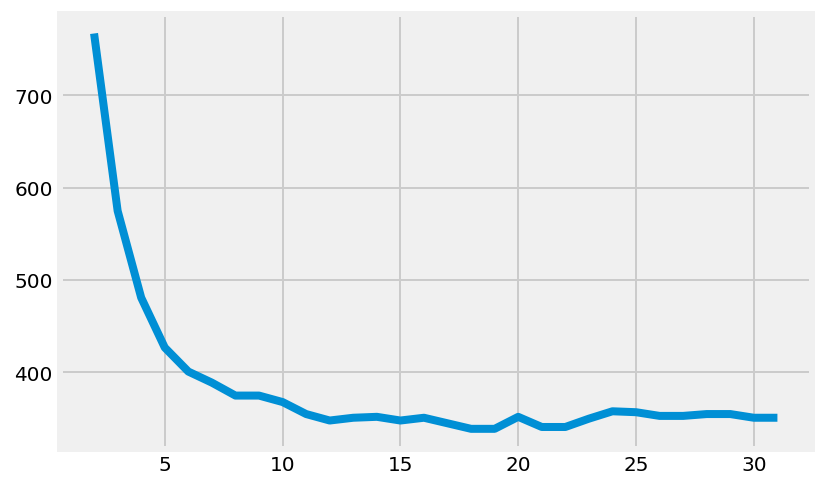

In [30]:
num_events = []
close = bitcoin['close']
for window in windows:
    rolling_mean_col = bitcoin[str(window) + ' Day Rolling Mean']
    rolling_sd_col = bitcoin[str(window) + ' Day SD']
    diff = abs(rolling_mean_col - close) >= 2 * rolling_sd_col
    num_event_detected = np.count_nonzero(diff)
    num_events += [num_event_detected]
plt.plot(windows, num_events)
num_events[5]

In [31]:
def isEvent_rollingmean(row, num_days):
    diff = abs(row['close'] - row[str(num_days) + ' Day Rolling Mean'])
    if diff >= 2 * row['7 Day SD']:
        return 1
    else:
        return 0

In [38]:
events = []
for window in windows:
    bitcoin['isEvent based on 2SD'] = bitcoin.apply(lambda x: isEvent_rollingmean(x, window), axis=1)
    print(str(window) + ' day rolling mean test')
    try:
        event = list(bitcoin['isEvent based on 2SD'].value_counts())[1]
    except:
        event = 0
    print(bitcoin['isEvent based on 2SD'].value_counts())
    events += [event]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2 day rolling mean test
0    1588
1     211
Name: isEvent based on 2SD, dtype: int64
3 day rolling mean test
0    1546
1     253
Name: isEvent based on 2SD, dtype: int64
4 day rolling mean test
0    1505
1     294
Name: isEvent based on 2SD, dtype: int64
5 day rolling mean test
0    1469
1     330
Name: isEvent based on 2SD, dtype: int64
6 day rolling mean test
0    1439
1     360
Name: isEvent based on 2SD, dtype: int64
7 day rolling mean test
0    1410
1     389
Name: isEvent based on 2SD, dtype: int64
8 day rolling mean test
0    1386
1     413
Name: isEvent based on 2SD, dtype: int64
9 day rolling mean test
0    1348
1     451
Name: isEvent based on 2SD, dtype: int64
10 day rolling mean test
0    1300
1     499
Name: isEvent based on 2SD, dtype: int64
11 day rolling mean test
0    1260
1     539
Name: isEvent based on 2SD, dtype: int64
12 day rolling mean test
0    1214
1     585
Name: isEvent based on 2SD, dtype: int64
13 day rolling mean test
0    1153
1     646
Name: isEvent bas

In [39]:
events;

Text(0,0.5,'Number of Events')

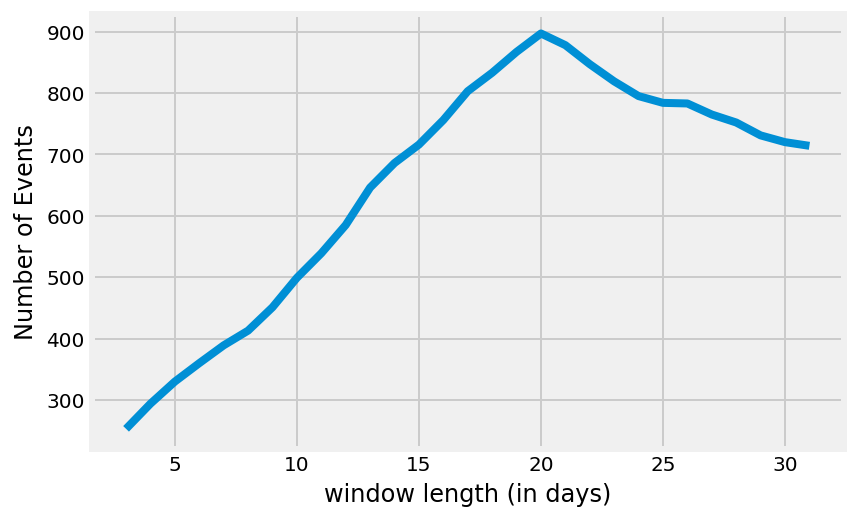

In [34]:
plt.plot(windows, events)
plt.xlabel('window length (in days)')
plt.ylabel('Number of Events')

In [21]:
bitcoin['prevClose'] = list([bitcoin['close'].values[0]] + list(bitcoin['close'].values))[:-1]
bitcoin['percentChange'] = (bitcoin['close'] - bitcoin['prevClose']) / bitcoin['prevClose']
bitcoin.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,slug,symbol,name,date,ranknow,open,high,low,close,volume,...,29 Day Volatility,29 Day SD,30 Day Rolling Mean,30 Day Volatility,30 Day SD,31 Day Rolling Mean,31 Day Volatility,31 Day SD,prevClose,percentChange
243,bitcoin,BTC,Bitcoin,2013-12-27,1,763.28,777.51,713.60,735.07,46862700.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,735.07,0.000000
244,bitcoin,BTC,Bitcoin,2013-12-28,1,737.98,747.06,705.35,727.83,32505800.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,735.07,-0.009849
245,bitcoin,BTC,Bitcoin,2013-12-29,1,728.05,748.61,714.44,745.05,19011300.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,727.83,0.023659
246,bitcoin,BTC,Bitcoin,2013-12-30,1,741.35,766.60,740.24,756.13,20707700.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,745.05,0.014871
247,bitcoin,BTC,Bitcoin,2013-12-31,1,760.32,760.58,738.17,754.01,20897300.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,756.13,-0.002804
248,bitcoin,BTC,Bitcoin,2014-01-01,1,754.97,775.35,754.97,771.40,22489400.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,754.01,0.023063
249,bitcoin,BTC,Bitcoin,2014-01-02,1,773.44,820.31,767.21,802.39,38489500.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,771.40,0.040174
250,bitcoin,BTC,Bitcoin,2014-01-03,1,802.85,834.15,789.12,818.72,37810100.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,802.39,0.020352
251,bitcoin,BTC,Bitcoin,2014-01-04,1,823.27,859.51,801.67,859.51,38005000.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,818.72,0.049822
252,bitcoin,BTC,Bitcoin,2014-01-05,1,858.55,952.40,854.52,933.53,72898496.0,...,300.442621,55.790794,831.439333,301.138604,54.980135,833.176129,305.749106,54.914161,859.51,0.086119


In [25]:
len(bitcoin.loc[abs(bitcoin['percentChange']) > 0.10]) # finding a good threshold --> 0.10 for now.

63

In [ ]:


def isEvent_percent(percentChange):
    return abs(percentChange) > 0.10
    
# bitcoin['isEventBaseline'] = bitcoin.apply(lambda x: isEventBaseline(x, 7), axis=1)
bitcoin['Naive Percent Event'] = bitcoin['percentChange'].apply(isEvent_percent)
list(bitcoin['Naive Percent Event'].value_counts())[-1]

In [ ]:
df = bitcoin[['open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 
              'spread', 'prevClose', '2 Day Rolling Mean', '2 Day SD', 
              '2 Day Volatility', 'percentChange', 'isEventBaseline']]

In [ ]:
sns.kdeplot(df['close'])

In [ ]:
sns.kdeplot(df['2 Day Rolling Mean'])

In [ ]:
sns.kdeplot(df['volume'])

In [ ]:
sns.kdeplot(df['close_ratio'])

In [ ]:
sns.kdeplot(df['spread'])

In [ ]:
sns.kdeplot(df['percentChange'])

In [ ]:
df.isna().sum() / len(df)

In [ ]:
df.to_csv('baseline_def_kaggle.csv')

## Results

After careful data cleaning, manipulation, feature selection, and copious trial and error, we were able to generate some pretty interesting findings through the EDA process. There are two major findings, one pertaining to the baseline definition of an event (significant price change), and the other pertaining to the data used for this analysis.

#### Baseline Definition Alterations

Initially, Paradigm suggested a simple baseline definition stating that any occurrence where the closing price for a given day differs from the two-day rolling mean by more than 2 standard deviations should be flagged as an event (significant price change). However, when utilizing this definition, 0 events were flagged in the 5 year timespan covered in Kaggle's cryptocurrency dataset on Bitcoin; this seems illogical. As such we are currently using a baseline definition in which a price change of greater than 10% from the previous close price is flagged as an event.

#### Data Concerns

As can be seen for the KDE density plots for many of the variables above, most of the plots do not show a desirable distribution typical of machine learning analytics. Most machine learning alogorithms assume that the variables have a normal, stationary distribution, in which case, the KDE density plots would appear as a bell curve. Otherwise, the output generated by machine learning algorithms will likely be prone to large amounts of bias. This is most likely because cryptocurrency lacked visibility in the initial dates covered in this dataset, while the later dates encompassed a huge boom in the price, which created an imbalanced dataset. Again, this could be fixed if we were to have more data, along with data on different cryptocurrencies –– this would require access to the Coinbase API data. 

#### Next Steps

There is far too little data to justify use of a neural network, but ensemble algorithms such as Random Forests (CART), Isolation Forests, and Gradient Boosting Machines could prove to be useful in this case. Alternatively, we are also looking into using K-means and other clustering algorithms for this problem. We've also discussed validating our results using ARIMA/SARIMA models and results from the other Paradigm team.  